# Waveform Basics with NumPy

This notebook covers the fundamentals of generating and visualizing waveforms using NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 4)

## 1. Basic Sine Wave Generation

A sine wave is defined by:
$$y(t) = A \sin(2\pi f t + \phi)$$

Where:
- $A$ = amplitude
- $f$ = frequency (Hz)
- $t$ = time
- $\phi$ = phase (radians)

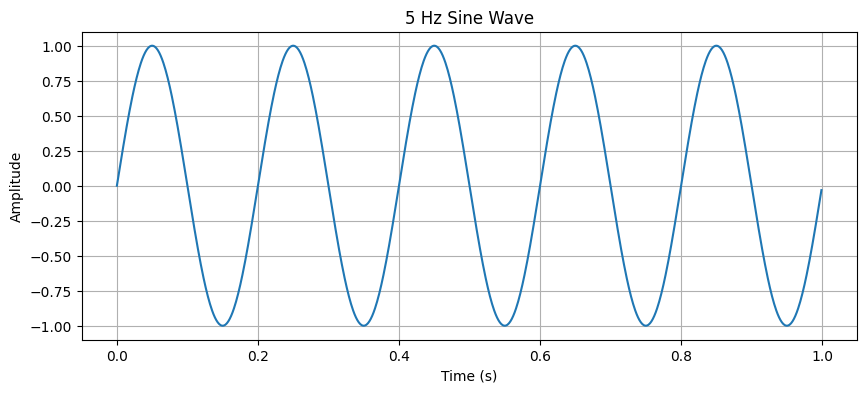

In [2]:
def generate_sine_wave(frequency, amplitude=1.0, phase=0.0, duration=1.0, sample_rate=1000):
    """Generate a sine wave with specified parameters."""
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    y = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    return t, y

# Generate a 5 Hz sine wave
t, y = generate_sine_wave(frequency=5, amplitude=1.0, duration=1.0)

plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('5 Hz Sine Wave')
plt.grid(True)
plt.show()

## 2. Cosine Wave Generation

A cosine wave is similar but uses the cosine function:
$$y(t) = A \cos(2\pi f t + \phi)$$

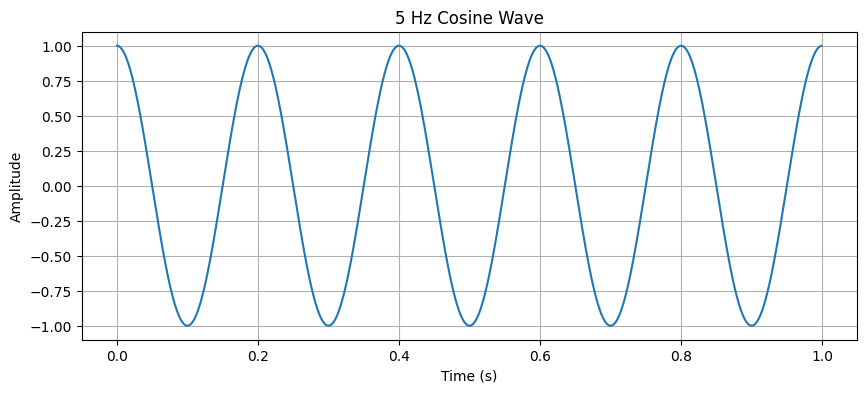

In [3]:
def generate_cosine_wave(frequency, amplitude=1.0, phase=0.0, duration=1.0, sample_rate=1000):
    """Generate a cosine wave with specified parameters."""
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    y = amplitude * np.cos(2 * np.pi * frequency * t + phase)
    return t, y

# Generate a 5 Hz cosine wave
t, y = generate_cosine_wave(frequency=5, amplitude=1.0, duration=1.0)

plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('5 Hz Cosine Wave')
plt.grid(True)
plt.show()

## 3. Varying Frequency, Amplitude, and Phase

Let's explore how each parameter affects the waveform.

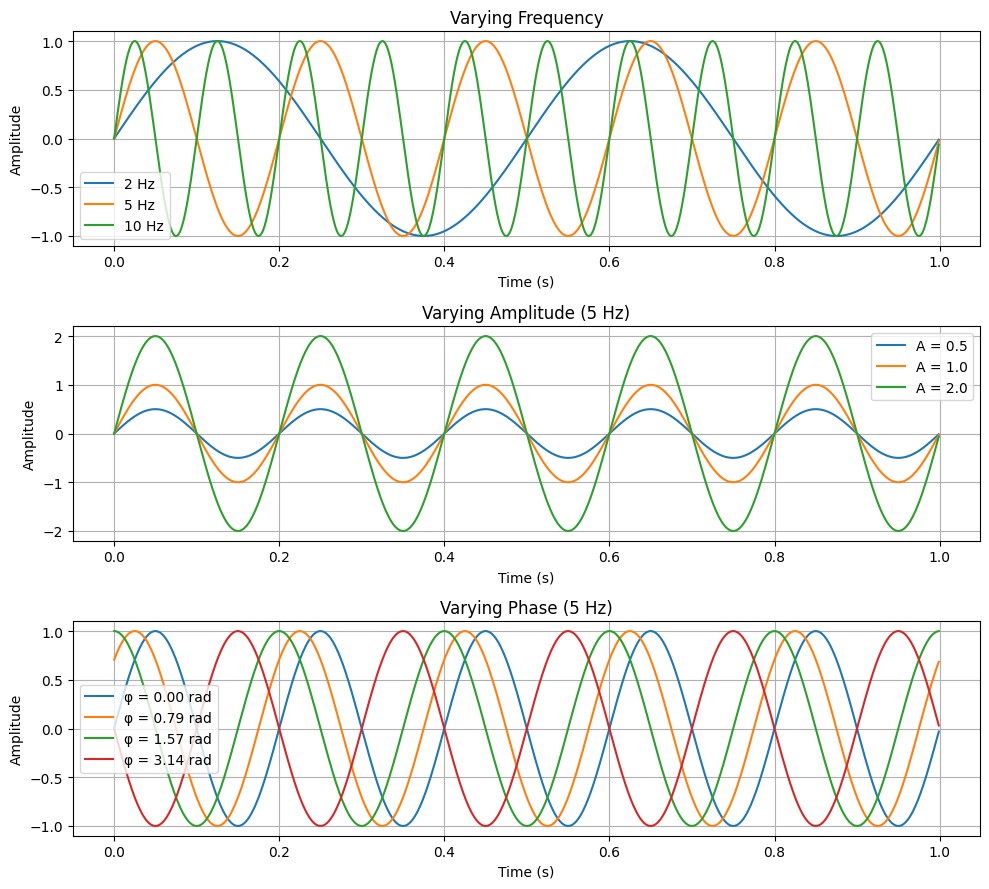

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(10, 9))

# Varying frequency
ax = axes[0]
for freq in [2, 5, 10]:
    t, y = generate_sine_wave(frequency=freq, duration=1.0)
    ax.plot(t, y, label=f'{freq} Hz')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Varying Frequency')
ax.legend()
ax.grid(True)

# Varying amplitude
ax = axes[1]
for amp in [0.5, 1.0, 2.0]:
    t, y = generate_sine_wave(frequency=5, amplitude=amp, duration=1.0)
    ax.plot(t, y, label=f'A = {amp}')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Varying Amplitude (5 Hz)')
ax.legend()
ax.grid(True)

# Varying phase
ax = axes[2]
for phase in [0, np.pi/4, np.pi/2, np.pi]:
    t, y = generate_sine_wave(frequency=5, phase=phase, duration=1.0)
    ax.plot(t, y, label=f'φ = {phase:.2f} rad')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Varying Phase (5 Hz)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

## 4. Phase Relationship: Sine vs Cosine

Sine and cosine are related by a phase shift of $\frac{\pi}{2}$ radians (90°):
$$\cos(\theta) = \sin(\theta + \frac{\pi}{2})$$

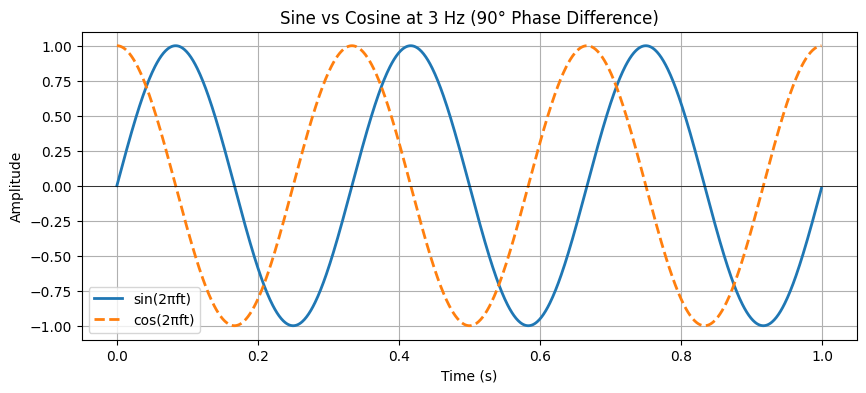

Max difference between cos(x) and sin(x + π/2): 1.84e-15


In [5]:
frequency = 3  # Hz
duration = 1.0

t, sine_wave = generate_sine_wave(frequency=frequency, duration=duration)
_, cosine_wave = generate_cosine_wave(frequency=frequency, duration=duration)

plt.figure(figsize=(10, 4))
plt.plot(t, sine_wave, label='sin(2πft)', linewidth=2)
plt.plot(t, cosine_wave, label='cos(2πft)', linewidth=2, linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Sine vs Cosine at {frequency} Hz (90° Phase Difference)')
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.show()

# Verify the phase relationship
t, sine_shifted = generate_sine_wave(frequency=frequency, phase=np.pi/2, duration=duration)
print(f"Max difference between cos(x) and sin(x + π/2): {np.max(np.abs(cosine_wave - sine_shifted)):.2e}")

## 5. Wave Superposition

When waves combine, they add together (superposition principle). This creates complex waveforms from simple components.

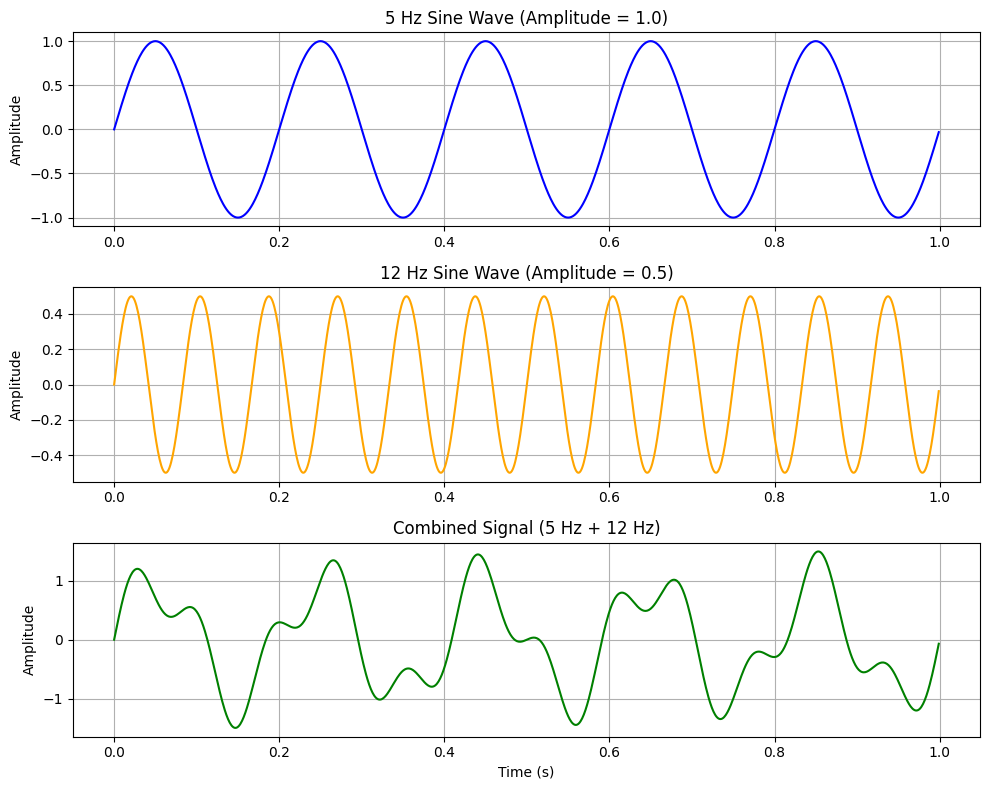

In [6]:
# Superposition of two sine waves
duration = 1.0
sample_rate = 1000

t, wave1 = generate_sine_wave(frequency=5, amplitude=1.0, duration=duration, sample_rate=sample_rate)
_, wave2 = generate_sine_wave(frequency=12, amplitude=0.5, duration=duration, sample_rate=sample_rate)

combined = wave1 + wave2

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].plot(t, wave1, color='blue')
axes[0].set_title('5 Hz Sine Wave (Amplitude = 1.0)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)

axes[1].plot(t, wave2, color='orange')
axes[1].set_title('12 Hz Sine Wave (Amplitude = 0.5)')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True)

axes[2].plot(t, combined, color='green')
axes[2].set_title('Combined Signal (5 Hz + 12 Hz)')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].grid(True)

plt.tight_layout()
plt.show()

## 6. Constructing Complex Waveforms

Many signals can be built from sine wave components. Here we create a square wave approximation using the Fourier series.

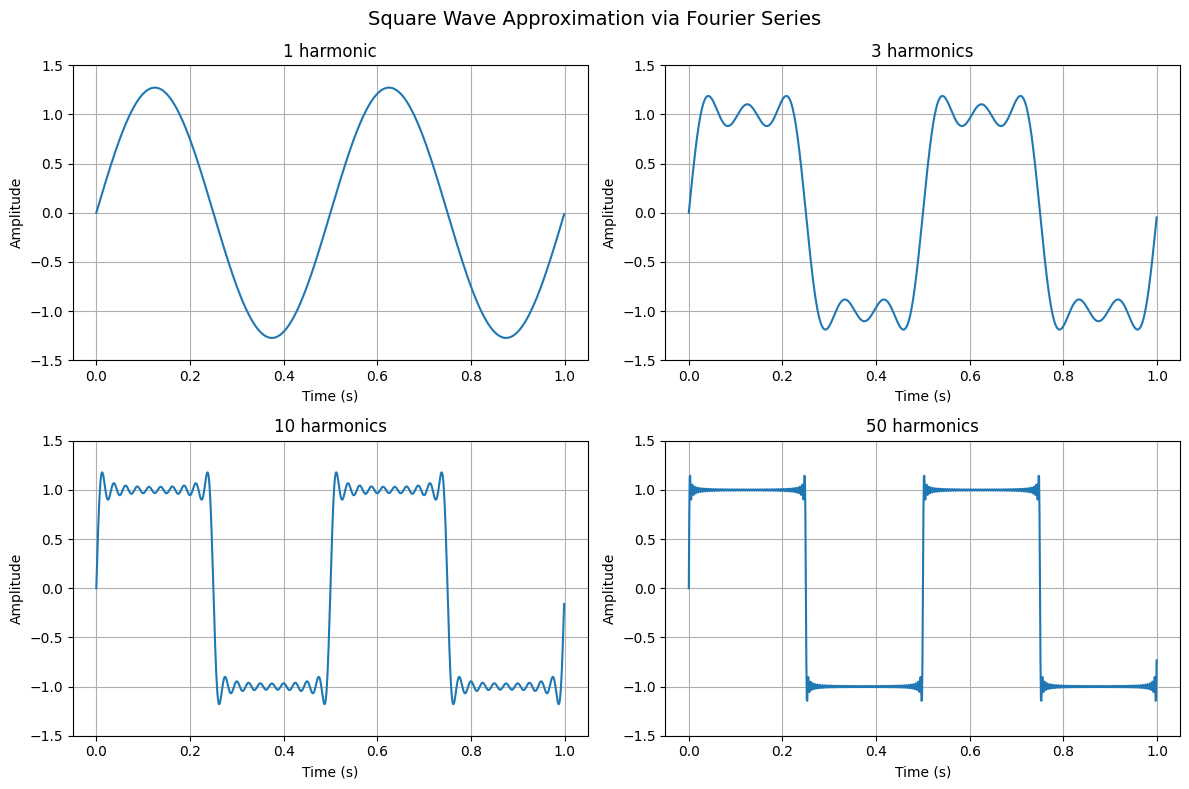

In [7]:
def square_wave_fourier(fundamental_freq, n_harmonics, duration=1.0, sample_rate=1000):
    """Approximate a square wave using Fourier series.
    
    Square wave = (4/π) * Σ sin((2k-1)ωt)/(2k-1) for k = 1, 2, 3, ...
    """
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    y = np.zeros_like(t)
    
    for k in range(1, n_harmonics + 1):
        n = 2 * k - 1  # Odd harmonics only
        y += np.sin(2 * np.pi * n * fundamental_freq * t) / n
    
    y *= 4 / np.pi
    return t, y

# Show how the approximation improves with more harmonics
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
harmonics_list = [1, 3, 10, 50]

for ax, n_harm in zip(axes.flat, harmonics_list):
    t, y = square_wave_fourier(fundamental_freq=2, n_harmonics=n_harm, duration=1.0)
    ax.plot(t, y)
    ax.set_title(f'{n_harm} harmonic{"s" if n_harm > 1 else ""}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_ylim(-1.5, 1.5)
    ax.grid(True)

plt.suptitle('Square Wave Approximation via Fourier Series', fontsize=14)
plt.tight_layout()
plt.show()

## 7. Beats: Interference of Close Frequencies

When two waves with similar frequencies combine, they create a "beating" effect.

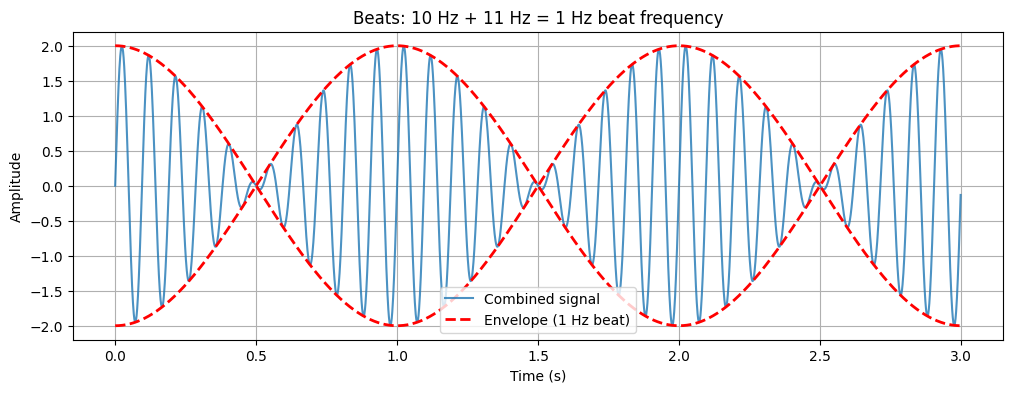

In [8]:
f1 = 10  # Hz
f2 = 11  # Hz (close to f1)
duration = 3.0

t, wave1 = generate_sine_wave(frequency=f1, duration=duration)
_, wave2 = generate_sine_wave(frequency=f2, duration=duration)
beats = wave1 + wave2

# Envelope of the beat frequency
beat_freq = abs(f2 - f1)
envelope = 2 * np.cos(2 * np.pi * beat_freq / 2 * t)

plt.figure(figsize=(12, 4))
plt.plot(t, beats, label='Combined signal', alpha=0.8)
plt.plot(t, envelope, 'r--', label=f'Envelope ({beat_freq} Hz beat)', linewidth=2)
plt.plot(t, -envelope, 'r--', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Beats: {f1} Hz + {f2} Hz = {beat_freq} Hz beat frequency')
plt.legend()
plt.grid(True)
plt.show()

## Summary

In this notebook, we covered:
- Generating sine and cosine waves with NumPy
- Controlling frequency, amplitude, and phase
- The 90° phase relationship between sine and cosine
- Wave superposition and combining multiple frequencies
- Building complex waveforms from simple components
- Beat frequencies from interfering waves

Next, in **02_fft_analysis.ipynb**, we'll explore how to decompose signals into their frequency components using the Fast Fourier Transform.